In [149]:
import pandas as pd
import nltk
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
import re


In [4]:
# nltk.download()

In [18]:
df = pd.read_csv("IMDB Dataset.csv")
target = "sentiment"
target_dict = {"positive":1, "negative":0}
df.sentiment = df.sentiment.map(target_dict)

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [7]:
df.shape

(50000, 2)

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [22]:
X_train, X_test, y_train, y_test = \
train_test_split(df.review,df[target], 
                 test_size=0.3, random_state=42)

In [150]:
# создадим препроцессор для CountVectorizer
stemmer = nltk.stem.snowball.EnglishStemmer('english')
def my_preprocessor(text):
#     return(stemmer.stem(doc).lower())
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
#     text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

In [151]:
pl = Pipeline([
 ("count",CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'), 
                                    ngram_range=(1,2), 
                                    preprocessor=my_preprocessor,
                                   max_df=0.5,
                                   min_df=2)),
("tfidf", TfidfTransformer(norm=None)),
    ("clf", LogisticRegressionCV(Cs=10, n_jobs=-1, verbose=1))
 
    
    
])

In [152]:
%%time
pl.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min finished


Wall time: 5min 31s


Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=2,
                                 ngram_range=(1, 2),
                                 preprocessor=<function my_preprocessor at 0x00000240E8658168>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ou...
                 TfidfTransformer(norm=None, smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                                      dual=False, fit_intercept=True,
                   

In [154]:
%%time
y_predicted = pl.predict(X_test)
print(classification_report(y_test, y_predicted, target_names =target_dict.keys()))

              precision    recall  f1-score   support

    positive       0.91      0.90      0.90      7411
    negative       0.90      0.91      0.91      7589

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000

Wall time: 57 s


# качество получилось весьма приличное
## посмотрим, насколько хуже будет без стеммигга

In [28]:
%%time
pl2 = Pipeline([
 ("count",CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'), 
                                    ngram_range=(1,2), 
#                                     preprocessor=my_preprocessor,
                                   max_df=0.5,
                                   min_df=2)),
("tfidf", TfidfTransformer(norm=None)),
    ("clf", LogisticRegressionCV(Cs=10, n_jobs=-1, verbose=1))
])
pl2.fit(X_train, y_train)
y_predicted = pl2.predict(X_test)
print(classification_report(y_test, y_predicted, target_names =target_dict.keys()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


              precision    recall  f1-score   support

    positive       0.91      0.90      0.91      7411
    negative       0.90      0.91      0.91      7589

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000

Wall time: 3min 4s


## а теперь еще и без биграмм

In [29]:
%%time
pl3 = Pipeline([
 ("count",CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'), 
#                                     ngram_range=(1), 
#                                     preprocessor=my_preprocessor,
                                   max_df=0.5,
                                   min_df=2)),
("tfidf", TfidfTransformer(norm=None)),
    ("clf", LogisticRegressionCV(Cs=10, n_jobs=-1, verbose=1))
])
pl3.fit(X_train, y_train)
y_predicted = pl3.predict(X_test)
print(classification_report(y_test, y_predicted, target_names=target_dict.keys()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s finished


              precision    recall  f1-score   support

    positive       0.90      0.89      0.90      7411
    negative       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

Wall time: 44.2 s


In [30]:
## в нашем случае стемминг практически не влиял на качество, а вот удаление биграмм ухудшало сильно. а что если посчитать на одних только биграммах?

In [33]:
%%time
pl4 = Pipeline([
 ("count",CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'), 
                                    ngram_range=(2,2), 
#                                     preprocessor=my_preprocessor,
                                   max_df=0.5,
                                   min_df=2)),
("tfidf", TfidfTransformer(norm=None)),
    ("clf", LogisticRegressionCV(Cs=10, n_jobs=-1, verbose=1))
])
pl4.fit(X_train, y_train)
y_predicted = pl4.predict(X_test)
print(classification_report(y_test, y_predicted, target_names=target_dict.keys()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


              precision    recall  f1-score   support

    positive       0.88      0.86      0.87      7411
    negative       0.87      0.89      0.88      7589

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000

Wall time: 1min 33s


## на одних биграммах еще упало качество. А что если вообще отказаться от TFIDF?

In [34]:
pl5 = Pipeline([
 ("count",CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'), 
                                    ngram_range=(1,2), 
                                    preprocessor=my_preprocessor,
                                   max_df=0.5,
                                   min_df=2)),
# ("tfidf", TfidfTransformer(norm=None)),
    ("clf", LogisticRegressionCV(Cs=10, n_jobs=-1, verbose=1))
 
    
    
])
pl5.fit(X_train, y_train)
y_predicted = pl5.predict(X_test)
print(classification_report(y_test, y_predicted, target_names=target_dict.keys()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


              precision    recall  f1-score   support

    positive       0.90      0.89      0.90      7411
    negative       0.90      0.90      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



## что-то не особо сильно упало. на этом эксперименты завершим

# Посмотрим, какие переменные у нас являлись самыми важными
## буду смотреть схему без стемминга, она показала наивысшее качество

In [158]:
coef = pl2['clf'].coef_[0]
f_names = np.array(pl2["count"].get_feature_names())
sorted_order = np.argsort(coef)


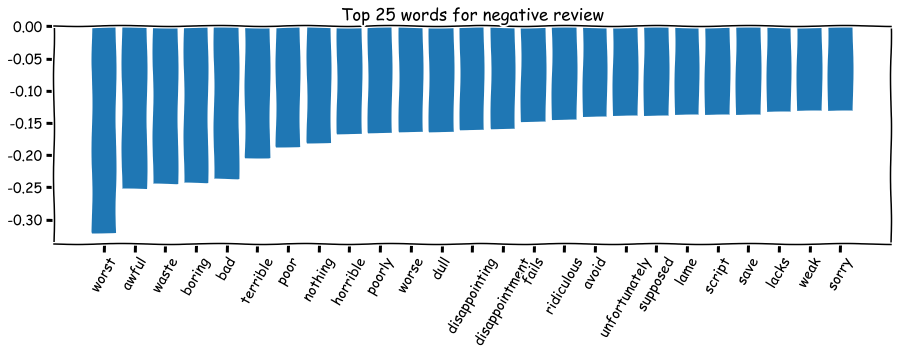

In [159]:
n_words = 25
plt.figure(figsize=(15, 4))
plt.xkcd(scale=0.5, randomness=2)
plt.title("Top {} words for negative review".format(n_words))
plt.bar(f_names[sorted_order][:n_words],coef[sorted_order][:n_words])
plt.xticks(rotation=60)
plt.show()

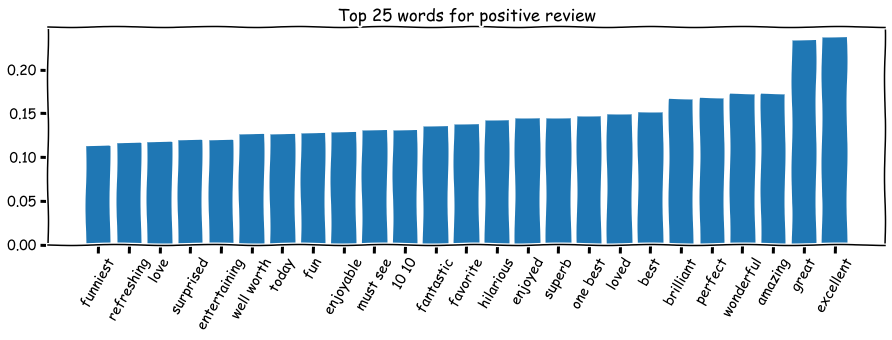

In [160]:
n_words = 25
plt.figure(figsize=(15, 4))
plt.xkcd(scale=0.5, randomness=2)
plt.title("Top {} words for positive review".format(n_words))
plt.bar(f_names[sorted_order][-n_words:],coef[sorted_order][-n_words:])
plt.xticks(rotation=60)
plt.show()

# Посмотрим, какие слова из значимых для модели чаще встречаются в нашей выборке

In [199]:
%%time 
from wordcloud import WordCloud
word_counts = pl2["count"].transform(X_test).astype("int8").toarray().sum(axis=0)

Wall time: 25.2 s


In [215]:
n_words = 50
bad_words_freq = dict(zip(f_names[sorted_order][:n_words],word_counts[sorted_order][:n_words]))
good_words_freq = dict(zip(f_names[sorted_order][-n_words:],word_counts[sorted_order][-n_words:]))
all_words = bad_words_freq.copy()
all_words.update(good_words_freq)

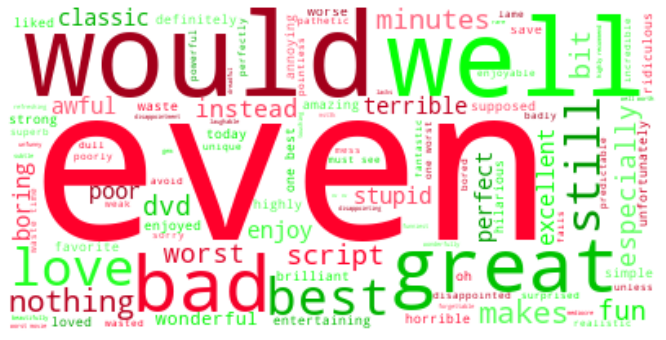

In [222]:
import random
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    if word in bad_words_freq.keys():
        return "hsl(350, 100%%, %d%%)" % random.randint(30, 70)
    if word in good_words_freq.keys():
        return "hsl(120, 100%%, %d%%)" % random.randint(30, 70)    
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(all_words)
plt.figure(figsize=(15, 6))
plt.axis("off")
plt.imshow(wc.recolor(color_func=color_func), interpolation="bilinear")
plt.show()